# About: Deep Learning Spring '23 Handson Tutorial 

* We will learning to implement a Logistic Regression Classifier on the [covtype](https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/covtype.libsvm.binary.scale.bz2) dataset. 
* Author: Sayan Mahapatra


## Outcomes:
1. Learning to preprocess datasets and build Pytorch Datasets & Dataloaders
2. Learning to build Pytorch Neural Net models
3. Implementing training, validation & test loops
4. Avoid overfitting using techniques like Early Stopping
5. Try out a deeper network for improving performance

# Params

In [19]:
lr = 0.5
train_size = 0.8
test_size = 0.5
batch_size = 2048

In [2]:
import torch
torch.manual_seed(0)
import random
random.seed(0)
import numpy as np
np.random.seed(0)

# Preparing the Dataset

In [3]:
!wget https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/covtype.libsvm.binary.scale.bz2

--2023-02-02 13:40:04--  https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/covtype.libsvm.binary.scale.bz2
Resolving www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)... 140.112.30.26
Connecting to www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)|140.112.30.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8216081 (7.8M) [application/x-bzip2]
Saving to: ‘covtype.libsvm.binary.scale.bz2’

covtype.libsvm.bina 100%[===================>]   7.83M  3.37MB/s    in 2.3s    

2023-02-02 13:40:08 (3.37 MB/s) - ‘covtype.libsvm.binary.scale.bz2’ saved [8216081/8216081]



In [4]:
!bzip2 -dvk /content/covtype.libsvm.binary.scale.bz2

  /content/covtype.libsvm.binary.scale.bz2: done


In [11]:
!head /content/covtype.libsvm.binary.scale

1 1:0.368684 2:0.141667 3:0.0454545 4:0.184681 5:0.223514 6:0.0716594 7:0.870079 8:0.913386 9:0.582677 10:0.875366 11:1 43:1 
1 1:0.365683 2:0.155556 3:0.030303 4:0.151754 5:0.215762 6:0.0547984 7:0.866142 8:0.925197 9:0.594488 10:0.867838 11:1 43:1 
2 1:0.472736 2:0.386111 3:0.136364 4:0.19184 5:0.307494 6:0.446817 7:0.92126 8:0.937008 9:0.531496 10:0.853339 11:1 26:1 
2 1:0.463232 2:0.430556 3:0.272727 4:0.173228 5:0.375969 6:0.434172 7:0.937008 8:0.937008 9:0.480315 10:0.865886 11:1 44:1 
1 1:0.368184 2:0.125 3:0.030303 4:0.10952 5:0.222222 6:0.0549389 7:0.866142 8:0.92126 9:0.590551 10:0.860449 11:1 43:1 
2 1:0.36018 2:0.366667 3:0.0909091 4:0.214746 5:0.204134 6:0.00941408 7:0.905512 8:0.933071 9:0.551181 10:0.840792 11:1 43:1 
1 1:0.373687 2:0.125 3:0.106061 4:0.193271 5:0.229974 6:0.088942 7:0.874016 8:0.885827 9:0.543307 10:0.872159 11:1 43:1 
1 1:0.373187 2:0.136111 3:0.0606061 4:0.167502 5:0.232558 6:0.0805115 7:0.874016 8:0.905512 9:0.566929 10:0.868256 11:1 43:1 
1 1:0.3791

In [6]:
from sklearn.datasets import load_svmlight_file

X, y = load_svmlight_file("/content/covtype.libsvm.binary.scale")

In [7]:
print(y)
y[y < 2] = 0
y[y > 0] = 1
print(y)

[1. 1. 2. ... 1. 1. 1.]
[0. 0. 1. ... 0. 0. 0.]


In [8]:
label_1 = np.average(y)
label_0 = 1 - label_1
print(f"% Label 0: {label_0},  % Label 1: {label_1}")

% Label 0: 0.5124007765760432,  % Label 1: 0.48759922342395684


In [9]:
X = X.todense()
Y = np.column_stack([y])
X = X.astype(np.float32)
Y = Y.astype(np.float32)
print(type(X), type(Y))
print(X.shape, Y.shape)

<class 'numpy.matrix'> <class 'numpy.ndarray'>
(581012, 54) (581012, 1)


In [ ]:
# Sample a smaller dataset
from sklearn.model_selection import train_test_split
X, _, Y, _,  = train_test_split(X, Y, train_size=100000)
label_1 = np.average(Y)
label_0 = 1 - label_1
print(f"% Label 0: {label_0},  % Label 1: {label_1}")

% Label 0: 0.5132400095462799,  % Label 1: 0.4867599904537201


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_rem, Y_train, Y_rem = train_test_split(X, Y, train_size=train_size, random_state=42)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem, Y_rem, test_size=test_size, random_state=42)

In [ ]:
X_valid, Y_valid

(matrix([[3.283e+03, 3.000e+01, 1.500e+01, ..., 0.000e+00, 0.000e+00,
          0.000e+00],
         [3.285e+03, 2.120e+02, 9.000e+00, ..., 0.000e+00, 0.000e+00,
          0.000e+00],
         [3.318e+03, 4.000e+01, 1.600e+01, ..., 0.000e+00, 1.000e+00,
          0.000e+00],
         ...,
         [3.135e+03, 9.000e+00, 5.000e+00, ..., 0.000e+00, 0.000e+00,
          0.000e+00],
         [2.816e+03, 4.600e+01, 1.600e+01, ..., 0.000e+00, 0.000e+00,
          0.000e+00],
         [3.391e+03, 2.950e+02, 5.000e+00, ..., 0.000e+00, 1.000e+00,
          0.000e+00]]), array([1., 2., 1., ..., 1., 2., 1.]))

## Building a Pytorch Dataset

Ref: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#creating-a-custom-dataset-for-your-files

In [13]:
from torch.utils.data import Dataset

class CovDataset(Dataset):
    def __init__(self, X, Y, transform=None, target_transform=None):
        self.X = torch.from_numpy(X)
        self.Y = torch.from_numpy(Y)
        self.n_samples = X.shape[0]

    def __len__(self):
        return self.n_samples

    def __getitem__(self, idx):
        x = self.X[idx]
        y = self.Y[idx]
        return x, y

In [14]:
train_dataset = CovDataset(X_train, Y_train)
test_dataset = CovDataset(X_test, Y_test)
valid_dataset = CovDataset(X_valid, Y_valid)
print(len(train_dataset), len(test_dataset), len(valid_dataset))

464809 58102 58101


In [15]:
train_dataset[0], train_dataset[1]

((tensor([0.7154, 0.0611, 0.2879, 0.1718, 0.3437, 0.2400, 0.8071, 0.7717, 0.4803,
          0.3622, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]),
  tensor([0.])),
 (tensor([0.5523, 0.0583, 0.2727, 0.0959, 0.2584, 0.1747, 0.8110, 0.7874, 0.5000,
          0.1589, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.000

In [41]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [18]:
train_features, train_labels = next(iter(train_dataloader))
train_features, train_labels

(tensor([[0.8304, 0.0389, 0.4091, 0.2112, 0.3333, 0.3785, 0.7205, 0.6772, 0.4488,
          0.3177, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000],
         [0.5868, 0.3500, 0.1515, 0.0959, 0.2339, 0.5869, 0.9370, 0.9173, 0.4921,
          0.3608, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]]),
 tensor([[0.

In [ ]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
label = train_labels[0]
print(f"Label: {label}")

Feature batch shape: torch.Size([2, 54])
Labels batch shape: torch.Size([2, 1])
Label: tensor([2.], dtype=torch.float64)


# Build Model

In [21]:
import torch.nn as nn

# Every Pytorch model must inherit the nn.Module and implement these two methods
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = torch.sigmoid(self.linear(x))
        return out

In [22]:
input_dim = 54
output_dim = 1
model = LogisticRegressionModel(input_dim, output_dim)

In [23]:
criterion = nn.BCELoss()

In [24]:
optimizer = torch.optim.SGD(model.parameters(), lr=lr)  

In [42]:
import math
import sys
print("Number of batches in an epoch ", math.ceil(len(train_dataset) / batch_size))

Number of batches in an epoch  7263


# Training loop

In [26]:
import time
start_time = time.time()

iter = 0
num_epochs = 10

# Losses per iteration (batch)
iteration_train_losses = []
iteration_valid_losses = []

# Losses per epoch
epoch_losses_train = []
epoch_losses_valid = []

for epoch in range(num_epochs):
    runningLoss = 0
    for i, (inputs, labels) in enumerate(train_dataloader):
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits)
        outputs = model(inputs)

        # Calculate Loss: binary cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        runningLoss += loss.item()

        iteration_train_losses.append(loss.item())

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 5000 == 0:
          # Print Loss
          pass
          # print('Iteration: {}. Loss: {}'.format(iter, loss.item()))
  
    epoch_losses_train.append(runningLoss / len(train_dataloader))

    # Validation Loss after every epoch
    runningLossValid = 0
    with torch.no_grad():
      for i, (inputs, labels) in enumerate(valid_dataloader):
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          runningLossValid += loss.item()
          iteration_valid_losses.append(loss.item())
      epoch_losses_valid.append(runningLossValid / len(valid_dataloader))
      
    print(f"Epoch {epoch:3}. Training Loss: {epoch_losses_train[-1]:.6f},  Validation Loss: {epoch_losses_valid[-1]:.6f}")

end_time = time.time()
print(f"Training took {end_time-start_time} seconds for {num_epochs} epochs")

Epoch   0. Training Loss: 0.616097,  Validation Loss: 0.585998
Epoch   1. Training Loss: 0.571144,  Validation Loss: 0.565675
Epoch   2. Training Loss: 0.556557,  Validation Loss: 0.555662
Epoch   3. Training Loss: 0.548290,  Validation Loss: 0.549401
Epoch   4. Training Loss: 0.542689,  Validation Loss: 0.544639
Epoch   5. Training Loss: 0.538493,  Validation Loss: 0.541234
Epoch   6. Training Loss: 0.535184,  Validation Loss: 0.538283
Epoch   7. Training Loss: 0.532533,  Validation Loss: 0.535883
Epoch   8. Training Loss: 0.530364,  Validation Loss: 0.533962
Epoch   9. Training Loss: 0.528507,  Validation Loss: 0.532408
Training took 31.701193809509277 seconds for 10 epochs


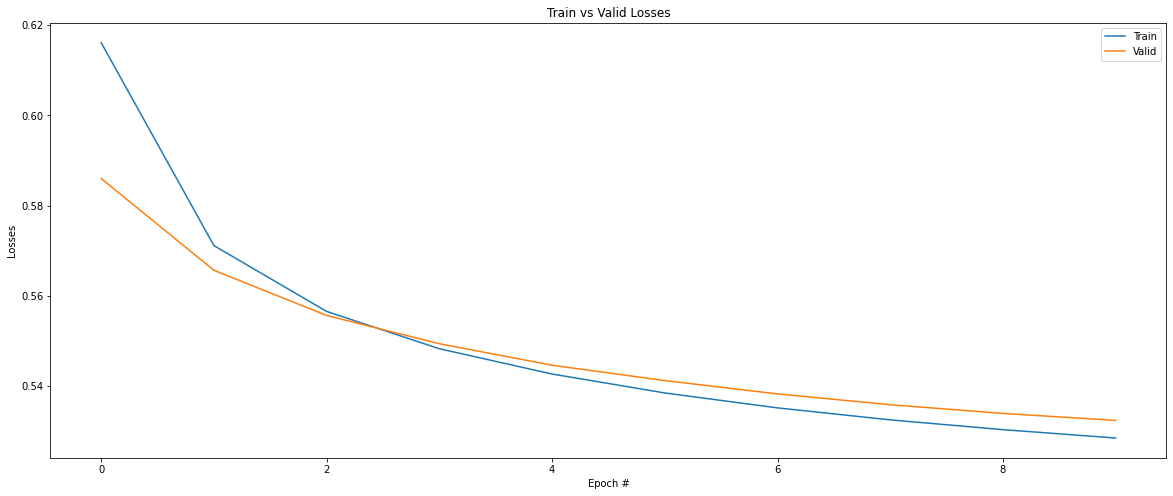

In [27]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,8)

plt.plot(epoch_losses_train)
plt.plot(epoch_losses_valid)
plt.xlabel('Epoch #')
plt.ylabel('Losses')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Losses')
plt.show()

## Calculate Accuracy on test dataset

In [28]:
with torch.no_grad():
  correct = 0
  for i, (inputs, labels) in enumerate(test_dataloader):
    y_pred = model(inputs)
    y_pred_cls = y_pred.round()
    correct += y_pred_cls.eq(labels).sum()
  print(f"Accuracy: {correct} / {len(test_dataset)} [{100 * correct / len(test_dataset):.2f}%]")

Accuracy: 43435 / 58102 [74.76%]


## Switch to GPU

1. Move the model to GPU
2. Move the data batch to GPU

Ref: https://towardsdatascience.com/pytorch-switching-to-the-gpu-a7c0b21e8a99


In [43]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [44]:
model = LogisticRegressionModel(input_dim, output_dim)
model.to(device)
criterion = nn.BCELoss()
learning_rate = 0.5
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


batch_size = 64

In [45]:
next(model.parameters()).is_cuda

True

In [46]:
import time
start_time = time.time()

iter = 0
num_epochs = 10

epoch_lrs = []

# Losses per iteration (batch)
iteration_train_losses = []
iteration_valid_losses = []

# Losses per epoch
epoch_losses_train = []
epoch_losses_valid = []

for epoch in range(num_epochs):
    runningLoss = 0
    epoch_lrs.append(optimizer.param_groups[0]['lr'])
    for i, (inputs, labels) in enumerate(train_dataloader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits)
        outputs = model(inputs)

        # Calculate Loss: binary cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        runningLoss += loss.item()

        iteration_train_losses.append(loss.item())

        # Updating parameters
        optimizer.step()

        iter += 1

    epoch_losses_train.append(runningLoss / len(train_dataloader))
    # print(f"Epoch {epoch} Loss {runningLoss / len(train_dataloader)}")

    # Validation Loss after every epoch
    runningLossValid = 0
    with torch.no_grad():
      for i, (inputs, labels) in enumerate(valid_dataloader):
          inputs, labels = inputs.to(device), labels.to(device)
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          runningLossValid += loss.item()
          iteration_valid_losses.append(loss.item())
      epoch_losses_valid.append(runningLossValid / len(valid_dataloader))
    print(f"Epoch {epoch:3}. Training Loss: {epoch_losses_train[-1]:.4f},  Validation Loss: {epoch_losses_valid[-1]:.4f}")


end_time = time.time()
print(f"Training took {end_time-start_time} seconds for {num_epochs} epochs")

Epoch   0. Training Loss: 0.5316,  Validation Loss: 0.5283
Epoch   1. Training Loss: 0.5172,  Validation Loss: 0.5202
Epoch   2. Training Loss: 0.5163,  Validation Loss: 0.5191
Epoch   3. Training Loss: 0.5160,  Validation Loss: 0.5190
Epoch   4. Training Loss: 0.5159,  Validation Loss: 0.5192
Epoch   5. Training Loss: 0.5157,  Validation Loss: 0.5191
Epoch   6. Training Loss: 0.5157,  Validation Loss: 0.5193
Epoch   7. Training Loss: 0.5158,  Validation Loss: 0.5195
Epoch   8. Training Loss: 0.5157,  Validation Loss: 0.5227
Epoch   9. Training Loss: 0.5156,  Validation Loss: 0.5252
Training took 77.63943195343018 seconds for 10 epochs


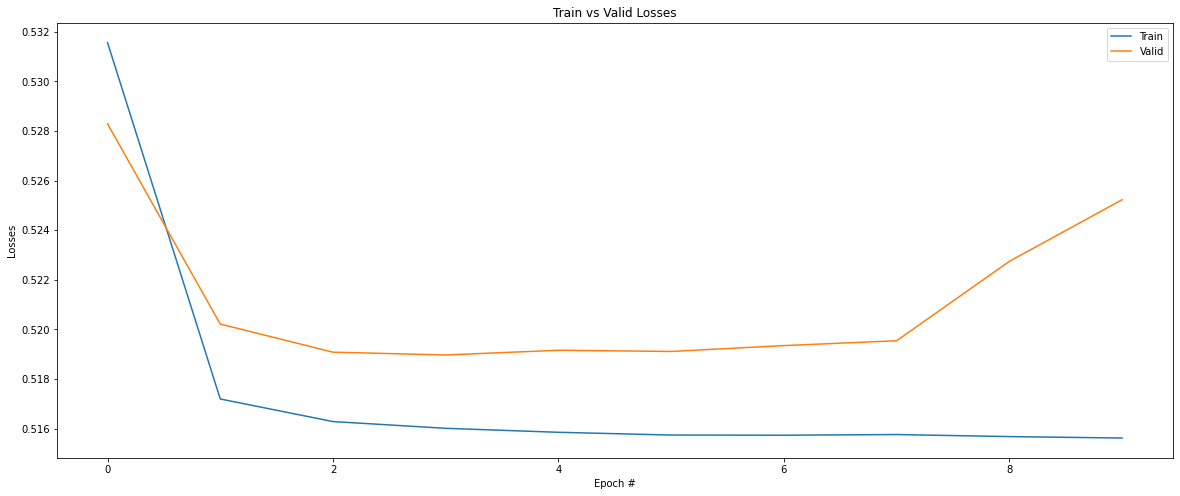

In [47]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,8)

plt.plot(epoch_losses_train)
plt.plot(epoch_losses_valid)
plt.xlabel('Epoch #')
plt.ylabel('Losses')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Losses')
plt.show()

In [48]:
with torch.no_grad():
  correct = 0
  for i, (inputs, labels) in enumerate(test_dataloader):
    inputs, labels = inputs.to(device), labels.to(device)
    y_pred = model(inputs)
    y_pred_cls = y_pred.round()
    correct += y_pred_cls.eq(labels).sum()
  print(f"Accuracy: {correct} / {len(test_dataset)} [{100 * correct / len(test_dataset):.2f}%]")

Accuracy: 43563 / 58102 [74.98%]


# Improving Performance

## LR Scheduling

[Ref](https://pytorch.org/docs/stable/optim.html)

```python
scheduler = ...
for epoch in range(100):
     train(...)
     validate(...)
     scheduler.step() # Updates LR
```

In [51]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = LogisticRegressionModel(input_dim, output_dim)
model.to(device)
criterion = nn.BCELoss()
learning_rate = 0.25
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [52]:
## Add LR scheduling
from  torch.optim.lr_scheduler import StepLR
from  torch.optim.lr_scheduler import ReduceLROnPlateau

# LR scheduling
# scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

scheduler = ReduceLROnPlateau(optimizer, 'min', patience=5)

## When to stop Training ?

Stop the training if the validation losses doesnot improve for **patience** epochs. This is called Early Stopping

In [ ]:
import time
start_time = time.time()

iter = 0
epoch_no = 0
num_epochs = 100
patience = 10
epoch_lrs = []

# Losses per iteration (batch)
iteration_train_losses = []
iteration_valid_losses = []

# Losses per epoch
epoch_losses_train = []
epoch_losses_valid = []

epoch_accuracies_valid = []

print("Training on device ", device)

for epoch in range(num_epochs):
    epoch_no = epoch
    runningLoss = 0
    epoch_lrs.append(optimizer.param_groups[0]['lr'])
    for i, (inputs, labels) in enumerate(train_dataloader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits)
        outputs = model(inputs)

        # Calculate Loss: binary cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        runningLoss += loss.item()

        iteration_loss =  round(loss.item(), 6)
        iteration_train_losses.append(iteration_loss)

        # Updating parameters
        optimizer.step()

        iter += 1

  
    epoch_train_loss = round(runningLoss / len(train_dataloader), 6)
    epoch_losses_train.append(epoch_train_loss)

    # Validation Loss after every epoch
    runningLossValid = 0
    correct = 0
    with torch.no_grad():
      for i, (inputs, labels) in enumerate(valid_dataloader):
          inputs, labels = inputs.to(device), labels.to(device)
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          runningLossValid += loss.item()
          iteration_valid_losses.append(loss.item())
      
          outputs_cls = outputs.round()
          correct += outputs_cls.eq(labels).sum().item()

      # -------------------------------------------------------------------- #
      #          EARLY STOPPING                                              #
      # -------------------------------------------------------------------- #
      epoch_loss_valid = round(runningLossValid / len(valid_dataloader), 6)
      epoch_losses_valid.append(epoch_loss_valid)

      epoch_accuracy_valid = 100.0 * correct / len(valid_dataset)
      epoch_accuracies_valid.append(epoch_accuracy_valid)

      stopTraining = False
      if len(epoch_losses_valid) > patience:
        stopTraining = True
        for loss in epoch_losses_valid[-(patience+1):-2]:
          if epoch_loss_valid < loss:
            stopTraining = False
            break

      print(f"Epoch {epoch:3}. Training Loss: {epoch_losses_train[-1]:.6f}", 
            f"Validation Loss: {epoch_losses_valid[-1]:.6f}.", 
            f"Learning Rate: {epoch_lrs[-1]:.7f}. Validation Accuracy: {epoch_accuracies_valid[-1]:.2f}%")

      if stopTraining:
        print(f"Validation loss not improved for last {patience} epochs. Stopping training.")
        break

    # scheduler.step() # Step Lr
    scheduler.step(epoch_losses_valid[-1])

end_time = time.time()
print(f"Training took {end_time-start_time} seconds for {epoch_no} epochs")

Training on device  cuda:0
Epoch   0. Training Loss: 0.541748 Validation Loss: 0.527069. Learning Rate: 0.2500000. Validation Accuracy: 75.01%
Epoch   1. Training Loss: 0.519411 Validation Loss: 0.522362. Learning Rate: 0.2500000. Validation Accuracy: 75.29%
Epoch   2. Training Loss: 0.516635 Validation Loss: 0.521215. Learning Rate: 0.2500000. Validation Accuracy: 75.19%
Epoch   3. Training Loss: 0.515754 Validation Loss: 0.520919. Learning Rate: 0.2500000. Validation Accuracy: 75.14%
Epoch   4. Training Loss: 0.515221 Validation Loss: 0.520172. Learning Rate: 0.2500000. Validation Accuracy: 75.26%
Epoch   5. Training Loss: 0.514993 Validation Loss: 0.518995. Learning Rate: 0.2500000. Validation Accuracy: 75.43%
Epoch   6. Training Loss: 0.514851 Validation Loss: 0.518918. Learning Rate: 0.2500000. Validation Accuracy: 75.49%
Epoch   7. Training Loss: 0.514719 Validation Loss: 0.522004. Learning Rate: 0.2500000. Validation Accuracy: 75.23%
Epoch   8. Training Loss: 0.514727 Validation

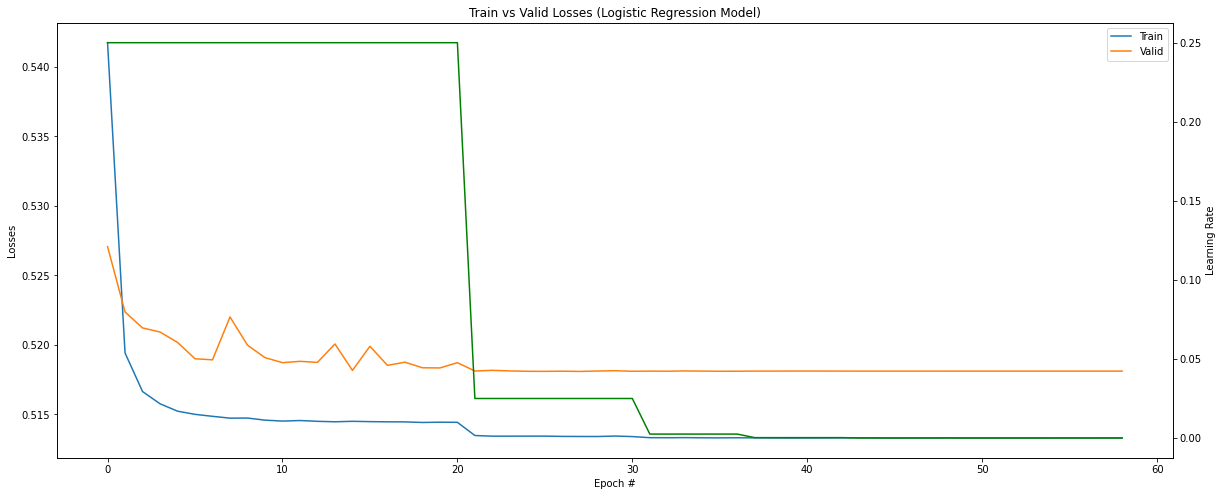

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,8)

fig, ax = plt.subplots()

ax.plot(epoch_losses_train)
ax.plot(epoch_losses_valid)
ax.set_xlabel('Epoch #')
ax.set_ylabel('Losses')

plt.legend(['Train','Valid'])

ax2 = ax.twinx()
ax2.plot(epoch_lrs, color='green')
ax2.set_ylabel('Learning Rate')

plt.title('Train vs Valid Losses (Logistic Regression Model)')
plt.show()

In [ ]:
with torch.no_grad():
  correct = 0
  for i, (inputs, labels) in enumerate(test_dataloader):
    inputs, labels = inputs.to(device), labels.to(device)
    y_pred = model(inputs)
    y_pred_cls = y_pred.round()
    correct += y_pred_cls.eq(labels).sum()
  print(f"Accuracy: {correct} / {len(test_dataset)} [{100 * correct / len(test_dataset):.2f}%]")

Accuracy: 43976 / 58102 [75.69%]


# Trying a Deeper model

The Logistic Regression model is too simple for this task. Consider that the dataset size is ~500K and we have only ~50 trainable parameters. So lets try a deeper network with more parameters.

In [53]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print("# Parameters in Logistic Regression Model", count_parameters(model))

# Parameters in Logistic Regression Model 55


## Define Model

In [55]:
# Every Pytorch model must inherit the nn.Module and implement these two methods
class DeepModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(DeepModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            # nn.Tanh(),
            nn.LeakyReLU(),
            # nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)    
        )
        
    def forward(self, x):
        out = torch.sigmoid(self.model(x))
        return out

In [56]:
input_dim = 54
hidden_dim = 108
output_dim = 1

# Hyperparameter Search
batch_size=64
learning_rate = 0.5

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = DeepModel(input_dim, hidden_dim, output_dim)
model.to(device)
print(model)
criterion = nn.BCELoss()

optimizer =  torch.optim.SGD(model.parameters(), lr=learning_rate)
scheduler = ReduceLROnPlateau(optimizer, 'min', patience=2)


train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("# Parameters in Deep Model", count_parameters(model))

DeepModel(
  (model): Sequential(
    (0): Linear(in_features=54, out_features=108, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=108, out_features=1, bias=True)
  )
)
# Parameters in Deep Model 6049


## Training Loop

Exactly same as before

In [ ]:
import time
start_time = time.time()

iter = 0
epoch_no = 0
num_epochs = 200
patience = 10
epoch_lrs = []

# Losses per iteration (batch)
iteration_train_losses = []
iteration_valid_losses = []

# Losses per epoch
epoch_losses_train = []
epoch_losses_valid = []

epoch_accuracies_valid = []

print("Training on device ", device)

for epoch in range(num_epochs):
    epoch_no = epoch
    runningLoss = 0
    epoch_lrs.append(optimizer.param_groups[0]['lr'])
    for i, (inputs, labels) in enumerate(train_dataloader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits)
        outputs = model(inputs)

        # Calculate Loss: binary cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        runningLoss += loss.item()

        iteration_loss =  round(loss.item(), 6)
        iteration_train_losses.append(iteration_loss)

        # Updating parameters
        optimizer.step()

        iter += 1

  
    epoch_train_loss = round(runningLoss / len(train_dataloader), 6)
    epoch_losses_train.append(epoch_train_loss)

    # Validation Loss after every epoch
    runningLossValid = 0
    correct = 0
    with torch.no_grad():
      for i, (inputs, labels) in enumerate(valid_dataloader):
          inputs, labels = inputs.to(device), labels.to(device)
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          runningLossValid += loss.item()
          iteration_valid_losses.append(loss.item())
      
          outputs_cls = outputs.round()
          correct += outputs_cls.eq(labels).sum().item()

      # -------------------------------------------------------------------- #
      #          EARLY STOPPING                                              #
      # -------------------------------------------------------------------- #
      epoch_loss_valid = round(runningLossValid / len(valid_dataloader), 6)
      epoch_losses_valid.append(epoch_loss_valid)

      epoch_accuracy_valid = 100.0 * correct / len(valid_dataset)
      epoch_accuracies_valid.append(epoch_accuracy_valid)

      stopTraining = False
      if len(epoch_losses_valid) > patience:
        stopTraining = True
        for loss in epoch_losses_valid[-(patience+1):-2]:
          if epoch_loss_valid < loss:
            stopTraining = False
            break

      print(f"Epoch {epoch:3}. Training Loss: {epoch_losses_train[-1]:.6f}", 
            f"Validation Loss: {epoch_losses_valid[-1]:.6f}.", 
            f"Learning Rate: {epoch_lrs[-1]:.7f}. Validation Accuracy: {epoch_accuracies_valid[-1]:.2f}%")

      if stopTraining:
        print(f"Validation loss not improved for last {patience} epochs. Stopping training.")
        break

    # scheduler.step() # Step Lr
    scheduler.step(epoch_losses_valid[-1])

end_time = time.time()
print(f"Training took {end_time-start_time} seconds for {epoch_no} epochs")

Training on device  cuda:0
Epoch   0. Training Loss: 0.485875 Validation Loss: 0.466855. Learning Rate: 0.5000000. Validation Accuracy: 78.25%
Epoch   1. Training Loss: 0.435784 Validation Loss: 0.414776. Learning Rate: 0.5000000. Validation Accuracy: 80.66%
Epoch   2. Training Loss: 0.418095 Validation Loss: 0.406618. Learning Rate: 0.5000000. Validation Accuracy: 80.99%
Epoch   3. Training Loss: 0.406623 Validation Loss: 0.393969. Learning Rate: 0.5000000. Validation Accuracy: 81.69%
Epoch   4. Training Loss: 0.398656 Validation Loss: 0.401656. Learning Rate: 0.5000000. Validation Accuracy: 81.03%
Epoch   5. Training Loss: 0.391623 Validation Loss: 0.385462. Learning Rate: 0.5000000. Validation Accuracy: 82.07%
Epoch   6. Training Loss: 0.386289 Validation Loss: 0.393537. Learning Rate: 0.5000000. Validation Accuracy: 81.63%
Epoch   7. Training Loss: 0.381497 Validation Loss: 0.401868. Learning Rate: 0.5000000. Validation Accuracy: 80.89%
Epoch   8. Training Loss: 0.377005 Validation

## Results

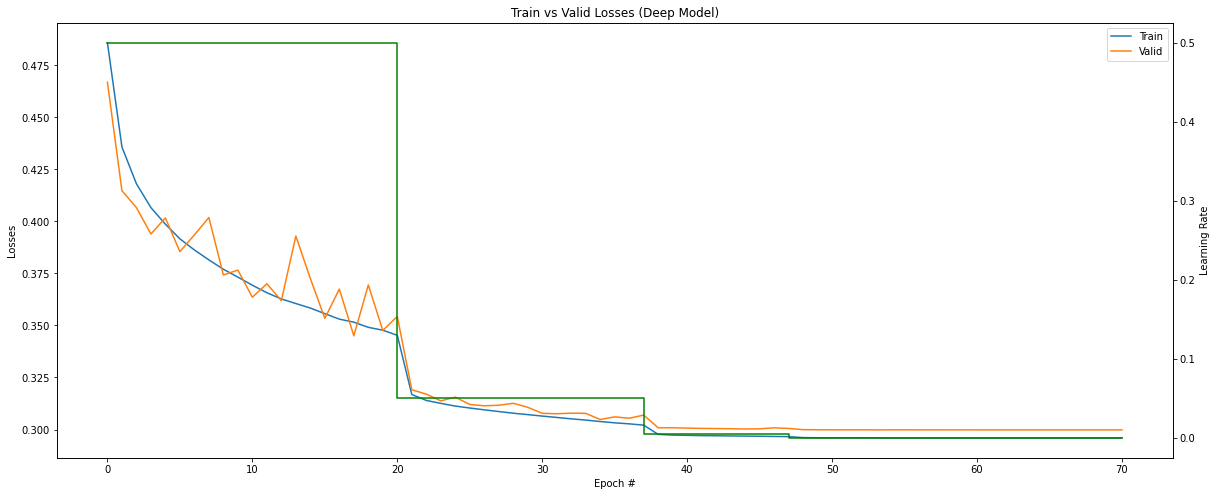

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,8)

fig, ax = plt.subplots()

ax.plot(epoch_losses_train)
ax.plot(epoch_losses_valid)
ax.set_xlabel('Epoch #')
ax.set_ylabel('Losses')

plt.legend(['Train','Valid'])

ax2 = ax.twinx()
ax2.step(range(epoch_no+1), epoch_lrs, color='green')
ax2.set_ylabel('Learning Rate')

plt.title('Train vs Valid Losses (Deep Model)')
plt.show()

In [ ]:
with torch.no_grad():
  correct = 0
  for i, (inputs, labels) in enumerate(test_dataloader):
    inputs, labels = inputs.to(device), labels.to(device)
    y_pred = model(inputs)
    y_pred_cls = y_pred.round()
    correct += y_pred_cls.eq(labels).sum()
  print(f"Accuracy: {correct} / {len(test_dataset)} [{100 * correct / len(test_dataset):.2f}%]")

Accuracy: 50450 / 58102 [86.83%]


# Next Steps

1. Run the whole process again with a smaller learning rate like 0.001, does overfitting occur?
2. Run the whole process again, after selecting a smaller sample of the dataset (say 100K units). How soon does the model overfit?


# Exercise

1. Currently we select the last model weights, and stop training. Extend the Early Stopping Functionality to select the best model (based on any metric) from the last **patience** model weights. 

2. We saw that by using Logistic Regression we could achieve accuracies of ~75 %. Implement a deeper Neural Network (2 hidden layers) and check if the accuracy is better. Note you need to only change the model definition class! Aim for > 90% accuracy.

# Further Reading

1. Learning Rate Scheduling. This process involves changing the Learning Rate during training (often as a function of epoch no, or validation performance). It may improve the final performance of the model. There are different types of Learning rate sheduling methods, try some and see if they help improve this model's performance. More details [here](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate)

2. As we see most of the code involves the training loop, device management and metric logging. There are frameworks to automate these steps, and produce clear, robust code. Check out [Pytorch Lightning](https://www.pytorchlightning.ai/)

3. Check out [TensorBoard] (https://www.tensorflow.org/tensorboard). It can automatically plot the graphs, and track many more metrics than logs. 

4. Try a different Neural Network on this dataset (preferably using steps 1 & 2)
